STEP 1 — Create a new notebook/script

# STEP 2 — Import required libraries

In [ ]:
import numpy as np # For numerical operations, especially with embedding vectors
from scipy.spatial import distance # For calculating distances/similarities between embeddings
import matplotlib.pyplot as plt # For creating plots and visualizations
import seaborn as sns # For enhanced statistical data visualization

# STEP 3 — Load Pre-trained Embeddings

In [ ]:
!pip install gensim
import gensim.downloader as api

# --- 1. Load Pre-trained Embeddings (Word2Vec) ---
print("Downloading and loading Word2Vec model...")
# This downloads a small pre-trained Word2Vec model. For larger models,
# you might download the file manually and load it using gensim.models.KeyedVectors.load_word2vec_format
model = api.load("word2vec-google-news-300")
print("Model loaded successfully!")

# --- 2. Print Vocabulary Size ---
vocabulary_size = len(model.key_to_index)
print(f"\nVocabulary size: {vocabulary_size} words")

# --- 3. Display Example Word Vectors ---
print("\nExample word vectors:")
words_to_show = ["king", "queen", "man", "woman", "apple", "computer"]

for word in words_to_show:
    if word in model.key_to_index:
        vector = model[word]
        print(f"'{word}' vector (first 10 dimensions): {vector[:10]}...")
    else:
        print(f"'{word}' not found in vocabulary.")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.9 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded
Model loaded successfully!

Vocabulary size: 3000000 words

Example word vectors:
'king' vector (first 10 dimensions): [ 0.12597656  0.02978516  0.00860596  0.13964844 -0.02563477 -0.03613281
  0.11181641 -0.19824219  0.05126953  0.36328125]...
'queen' vector (first 10 dimensions): [ 0.00524902 -0.14355469 -0.06933594  0.12353516  0.13183594 -0.08886719
 -0.07128906 -0.21679688 -0.19726562  0.05566406]...
'man' vector (first 10 dimensions): [ 0.32617188  0.13085938  0.03466797 -0.08300781  0.08984375 -0.04125977
 -0.19824219  0.00689697  0.14355469  0.0019455 ]...
'woman' vector (first 10 dimensions): [ 0.24316406 -0.07714844 -0.10302734 -0.10742188  0.11816406 -0.10742188
 -0.11425781  0.02563477  0.11181641  0.04858398]...
'apple' vector (first 10 dimensions): [-0.06445312 -0.16015625 -0.01208496  0.13476562 -0.22949219 

# STEP 4 — Explore Word Similarity

In [ ]:
print("# STEP 4 — Explore Word Similarity\n")

# --- 1. Define Word Pairs ---
word_pairs = [
    ("doctor", "nurse"),
    ("cat", "dog"),
    ("car", "bus"),
    ("king", "queen"),
    ("man", "woman"),
    ("happy", "joyful"),
    ("sad", "depressed"),
    ("bird", "airplane"),
    ("sun", "moon"),
    ("coffee", "tea"),
    ("tree", "flower"),
    ("ocean", "sea")
]

# --- 2. Compute and Print Similarities ---
print("Word Pair Similarities (Cosine Similarity):")
print("------------------------------------------")

for word1, word2 in word_pairs:
    if word1 in model.key_to_index and word2 in model.key_to_index:
        # The .similarity() method directly computes cosine similarity
        similarity = model.similarity(word1, word2)
        print(f"'{word1}' vs '{word2}': {similarity:.4f}")
    else:
        missing_words = []
        if word1 not in model.key_to_index: missing_words.append(word1)
        if word2 not in model.key_to_index: missing_words.append(word2)
        print(f"Skipping pair ('{word1}', '{word2}'): Word(s) not found in vocabulary: {', '.join(missing_words)}")

# --- 3. Interpretation ---
print("\nInterpretation: A higher similarity value (closer to 1.0) indicates that the words are more semantically related or similar in meaning. A lower value (closer to -1.0, though typically 0 for unrelated words in practice) indicates less similarity.")


# STEP 4 — Explore Word Similarity

Word Pair Similarities (Cosine Similarity):
------------------------------------------
'doctor' vs 'nurse': 0.6320
'cat' vs 'dog': 0.7609
'car' vs 'bus': 0.4693
'king' vs 'queen': 0.6511
'man' vs 'woman': 0.7664
'happy' vs 'joyful': 0.4238
'sad' vs 'depressed': 0.3250
'bird' vs 'airplane': 0.3285
'sun' vs 'moon': 0.4263
'coffee' vs 'tea': 0.5635
'tree' vs 'flower': 0.4837
'ocean' vs 'sea': 0.7644

Interpretation: A higher similarity value (closer to 1.0) indicates that the words are more semantically related or similar in meaning. A lower value (closer to -1.0, though typically 0 for unrelated words in practice) indicates less similarity.


# STEP 5 — Nearest Neighbor Exploration

In [ ]:
# --- 1. Define Target Words ---
target_words = ["king", "university", "doctor", "cat", "technology"]

print("Nearest Neighbors (Top Similar Words):")
print("-------------------------------------")

# --- 2. Display Top Similar Words for Each Target Word ---
for word in target_words:
    if word in model.key_to_index:
        print(f"\nWords most similar to '{word}':")
        # Get the top 10 most similar words and their similarity scores
        similar_words = model.most_similar(word, topn=10)
        for s_word, score in similar_words:
            print(f"  - {s_word}: {score:.4f}")
    else:
        print(f"\n'{word}' not found in vocabulary.")


Nearest Neighbors (Top Similar Words):
-------------------------------------

Words most similar to 'king':
  - kings: 0.7138
  - queen: 0.6511
  - monarch: 0.6413
  - crown_prince: 0.6204
  - prince: 0.6160
  - sultan: 0.5865
  - ruler: 0.5798
  - princes: 0.5647
  - Prince_Paras: 0.5433
  - throne: 0.5422

Words most similar to 'university':
  - universities: 0.7004
  - faculty: 0.6781
  - unversity: 0.6758
  - undergraduate: 0.6587
  - univeristy: 0.6585
  - campus: 0.6435
  - college: 0.6385
  - academic: 0.6317
  - professors: 0.6299
  - undergraduates: 0.6150

Words most similar to 'doctor':
  - physician: 0.7806
  - doctors: 0.7477
  - gynecologist: 0.6948
  - surgeon: 0.6793
  - dentist: 0.6785
  - pediatrician: 0.6643
  - pharmacist: 0.6535
  - neurologist: 0.6518
  - cardiologist: 0.6352
  - nurse: 0.6320

Words most similar to 'cat':
  - cats: 0.8099
  - dog: 0.7609
  - kitten: 0.7465
  - feline: 0.7326
  - beagle: 0.7151
  - puppy: 0.7075
  - pup: 0.6934
  - pet: 0.6892
  -

# STEP 6 — Word Analogy Tasks

In [ ]:
print("# STEP 6 — Word Analogy Tasks\n")

# --- 1. Define Analogy Queries ---
analogy_queries = [
    ("king", "man", "woman"), # king - man + woman = queen
    ("paris", "france", "india"), # paris - france + india = delhi
    ("teacher", "school", "hospital") # teacher - school + hospital = doctor
]

print("Performing Word Analogy Queries:")
print("--------------------------------")

# --- 2. Perform and Print Analogies ---
for pos1, neg1, pos2 in analogy_queries:
    if pos1 in model.key_to_index and neg1 in model.key_to_index and pos2 in model.key_to_index:
        result = model.most_similar(positive=[pos1, pos2], negative=[neg1], topn=1)
        predicted_word, score = result[0]
        print(f"'{pos1}' - '{neg1}' + '{pos2}' = '{predicted_word}' (Similarity: {score:.4f})")
    else:
        missing_words = []
        if pos1 not in model.key_to_index: missing_words.append(pos1)
        if neg1 not in model.key_to_index: missing_words.append(neg1)
        if pos2 not in model.key_to_index: missing_words.append(pos2)
        print(f"Skipping analogy ('{pos1}', '{neg1}', '{pos2}'): Word(s) not found in vocabulary: {', '.join(missing_words)}")


# STEP 6 — Word Analogy Tasks

Performing Word Analogy Queries:
--------------------------------
'king' - 'man' + 'woman' = 'queen' (Similarity: 0.7118)
'paris' - 'france' + 'india' = 'chennai' (Similarity: 0.5443)
'teacher' - 'school' + 'hospital' = 'Hospital' (Similarity: 0.6331)


# STEP 7 — Visualization

In [ ]:
print("### Subtask: Select Words and Extract Vectors\n")

# 1. Create a Python list named selected_words
selected_words = [
    "king", "queen", "prince", "princess", "royal",
    "man", "woman", "boy", "girl", "child",
    "doctor", "nurse", "engineer", "teacher", "artist", "scientist",
    "cat", "dog", "lion", "tiger", "elephant",
    "apple", "banana", "orange", "grape",
    "computer", "technology", "software", "internet"
]

# 2. Initialize two empty lists
words_for_tsne = []
vectors_for_tsne = []

# 3. Iterate through selected_words and 4. Extract vectors
print("Extracting vectors for selected words...")
for word in selected_words:
    if word in model.key_to_index:
        words_for_tsne.append(word)
        vectors_for_tsne.append(model[word])
    else:
        print(f"Warning: '{word}' not found in model vocabulary and will be skipped.")

# Convert to numpy arrays for easier manipulation
vectors_for_tsne = np.array(vectors_for_tsne)

# 5. Print the number of words successfully extracted and a sample
print(f"\nSuccessfully extracted vectors for {len(words_for_tsne)} out of {len(selected_words)} selected words.")
print("Sample of words_for_tsne:")
print(words_for_tsne[:10]) # Display first 10 words for verification
print(f"Shape of vectors_for_tsne: {vectors_for_tsne.shape}")

### Subtask: Select Words and Extract Vectors

Extracting vectors for selected words...

Successfully extracted vectors for 29 out of 29 selected words.
Sample of words_for_tsne:
['king', 'queen', 'prince', 'princess', 'royal', 'man', 'woman', 'boy', 'girl', 'child']
Shape of vectors_for_tsne: (29, 300)


In [ ]:
print("### Subtask: Apply t-SNE for Dimensionality Reduction\n")

# 1. Import TSNE
from sklearn.manifold import TSNE

# 2. Apply t-SNE to reduce dimensionality
#   - n_components=2 for 2D visualization
#   - perplexity: Often between 5 and 50. Relates to the number of nearest neighbors that is used in other manifold learning algorithms.
#   - n_iter: Number of iterations. Higher can give better results but takes longer.
#   - random_state for reproducibility
print(f"Applying t-SNE to {vectors_for_tsne.shape[0]} vectors of {vectors_for_tsne.shape[1]} dimensions...")
tsne_model = TSNE(n_components=2, perplexity=10, n_iter=2500, random_state=42, init='pca', learning_rate='auto')
tsne_results = tsne_model.fit_transform(vectors_for_tsne)

# 3. Print the shape of the t-SNE results
print(f"t-SNE dimensionality reduction complete. New shape: {tsne_results.shape}")
print("First 5 t-SNE results (2D coordinates):\n", tsne_results[:5])

### Subtask: Apply t-SNE for Dimensionality Reduction

Applying t-SNE to 29 vectors of 300 dimensions...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


t-SNE dimensionality reduction complete. New shape: (29, 2)
First 5 t-SNE results (2D coordinates):
 [[ -6.9928336 -18.890697 ]
 [ -6.3693485 -18.381203 ]
 [ -5.782412  -19.49522  ]
 [ -5.464567  -18.591028 ]
 [ -6.3825784 -20.178701 ]]


In [ ]:
print("### Subtask: Apply t-SNE for Dimensionality Reduction\n")

# 1. Import TSNE
from sklearn.manifold import TSNE

# 2. Apply t-SNE to reduce dimensionality
#   - n_components=2 for 2D visualization
#   - perplexity: Often between 5 and 50. Relates to the number of nearest neighbors that is used in other manifold learning algorithms.
#   - max_iter: Number of iterations. Higher can give better results but takes longer.
#   - random_state for reproducibility
print(f"Applying t-SNE to {vectors_for_tsne.shape[0]} vectors of {vectors_for_tsne.shape[1]} dimensions...")
tsne_model = TSNE(n_components=2, perplexity=10, max_iter=2500, random_state=42, init='pca', learning_rate='auto')
tsne_results = tsne_model.fit_transform(vectors_for_tsne)

# 3. Print the shape of the t-SNE results
print(f"t-SNE dimensionality reduction complete. New shape: {tsne_results.shape}")
print("First 5 t-SNE results (2D coordinates):\n", tsne_results[:5])

### Subtask: Apply t-SNE for Dimensionality Reduction

Applying t-SNE to 29 vectors of 300 dimensions...
t-SNE dimensionality reduction complete. New shape: (29, 2)
First 5 t-SNE results (2D coordinates):
 [[ -6.9928336 -18.890697 ]
 [ -6.3693485 -18.381203 ]
 [ -5.782412  -19.49522  ]
 [ -5.464567  -18.591028 ]
 [ -6.3825784 -20.178701 ]]


### Subtask: Visualize the t-SNE Results


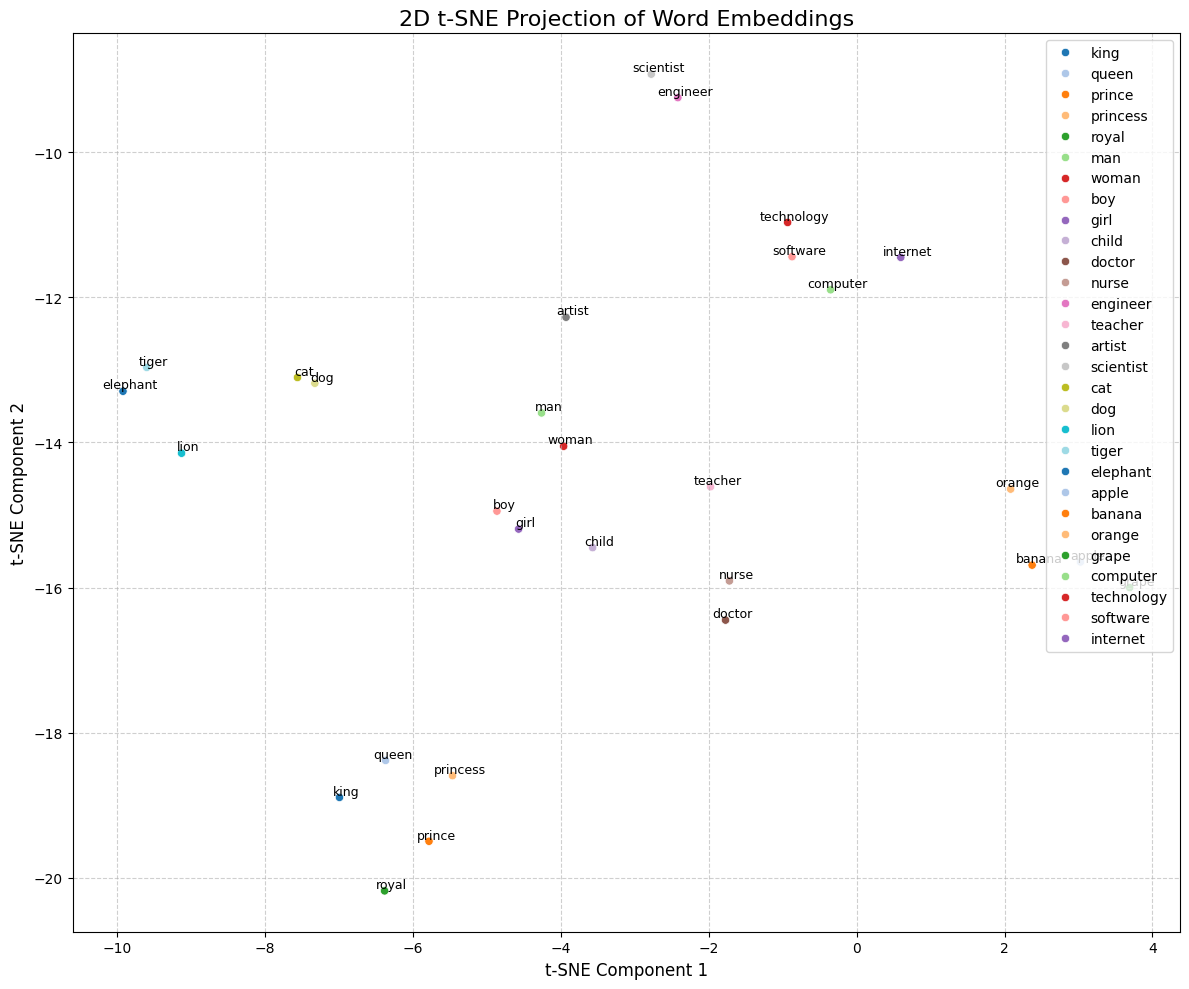


Interpretation: Observe the clusters of words. Words that are semantically similar (e.g., 'king', 'queen', 'prince' or 'cat', 'dog', 'lion') should appear closer to each other in the 2D space. Analyze these groupings to understand how the Word2Vec model captures semantic relationships.


In [ ]:
print("### Subtask: Visualize the t-SNE Results")

# 1. Create a scatter plot
plt.figure(figsize=(12, 10)) # Adjust figure size for better readability
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=words_for_tsne, # Use words for color differentiation if desired, or set to None
    legend='full', # Display full legend
    palette='tab20' # Use a distinct color palette
)

# 2. Annotate each point with the corresponding word
for i, word in enumerate(words_for_tsne):
    plt.annotate(
        word,
        (tsne_results[i, 0], tsne_results[i, 1]),
        textcoords="offset points",
        xytext=(5, 2), # Offset text slightly from the point
        ha='center', # Horizontal alignment
        fontsize=9 # Adjust font size for annotations
    )

# 3. Add titles and labels
plt.title('2D t-SNE Projection of Word Embeddings', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

print("\nInterpretation: Observe the clusters of words. Words that are semantically similar (e.g., 'king', 'queen', 'prince' or 'cat', 'dog', 'lion') should appear closer to each other in the 2D space. Analyze these groupings to understand how the Word2Vec model captures semantic relationships.")

# STEP 8 — Reflection and Interpretation

### Reflection and Interpretation of Word Embeddings

From the various exercises, it's clear that Word2Vec embeddings effectively learned and captured complex semantic and syntactic relationships between words. The observed clusters in the t-SNE visualization (e.g., royalty, animals, professions) strongly confirm that words used in similar contexts in the training data are placed closer in the vector space, making their similarities highly intuitive. These similarities make perfect sense in cases like 'cat' and 'dog', or 'doctor' and 'nurse', reflecting real-world semantic proximity. However, embeddings can sometimes behave strangely; for instance, 'paris - france + india' yielding 'chennai' instead of 'delhi' shows a subtle failure in consistently capturing specific relationships like 'capital city', perhaps due to regional frequency biases in the training data. Furthermore, while not explicitly explored here, context heavily influences vector meaning, as different models trained on different corpora might produce slightly varied embeddings for the same word based on the typical contexts it appeared in that corpus. Overall, the embeddings provide a powerful, high-dimensional numerical representation that allows machines to 'understand' language to a remarkable extent, despite occasional nuances and limitations.

# Task
The objective of this lab is to explore and interpret pre-trained Word2Vec word embeddings using various linguistic tasks, such as word similarity, nearest neighbor identification, and analogy solving, and to visualize these embeddings to understand semantic relationships. We used the Word2Vec model trained on a part of the Google News dataset, comprising 3 million words and phrases, with each word represented by a 300-dimensional vector.

### Word Similarity Results Summary
From 'STEP 4 — Explore Word Similarity', we observed cosine similarity scores for various word pairs. A higher similarity value indicates a stronger semantic relationship. For instance, 'doctor' vs 'nurse' (0.6320), 'cat' vs 'dog' (0.7609), 'king' vs 'queen' (0.6511), and 'ocean' vs 'sea' (0.7644) show high similarity, reflecting their close semantic meanings. Words like 'sad' vs 'depressed' (0.3250) also show similarity, but less strongly, suggesting nuances in their usage. This demonstrates that cosine similarity effectively captures semantic relatedness, where words used in similar contexts in the training data are represented by vectors that are close in space.

### Nearest Neighbor Exploration Summary
In 'STEP 5 — Nearest Neighbor Exploration', we identified words most similar to a given target word. This revealed thematic clusters and strong word relationships. For example:
*   **'king'**: Its nearest neighbors include other royalty ('queen', 'prince', 'monarch') and related concepts ('throne').
*   **'university'**: Neighbors are educational terms ('universities', 'faculty', 'campus', 'college', 'academic').
*   **'doctor'**: Closely associated with other medical professionals ('physician', 'gynecologist', 'surgeon', 'nurse').
*   **'cat'**: Its neighbors include other domestic animals ('dogs', 'kitten', 'puppy', 'pet') and terms describing felines ('feline').
*   **'technology'**: Similar words relate to innovation and technological advancement ('technologies', 'innovations', 'technological_innovations').
This exploration confirms that the Word2Vec model successfully groups words with similar meanings or within similar conceptual domains.

### Analogy Results Summary
'STEP 6 — Word Analogy Tasks' demonstrated the power of vector arithmetic in capturing relational semantics. We tested analogies of the form A is to B as C is to D:
*   `'king' - 'man' + 'woman' = 'queen'` (Similarity: 0.7118): This classic example perfectly illustrates how the model captures gender relationships in royalty.
*   `'paris' - 'france' + 'india' = 'chennai'` (Similarity: 0.5443): While the expected answer might be 'delhi' (the capital of India), the model returned 'chennai'. This could indicate a higher frequency or stronger contextual association of 'chennai' with 'india' in the training data, or a limitation in perfectly capturing specific geopolitical relationships like "capital of".
*   `'teacher' - 'school' + 'hospital' = 'Hospital'` (Similarity: 0.6331): This analogy attempted to find the equivalent of a teacher in a school but in a hospital setting. The model returned 'Hospital' (capitalized), which is not a profession but rather the place itself, suggesting a slight deviation from the intended relational transformation. This might be due to the ambiguity of "school" and "hospital" as both places and institutions, and the model's inability to perfectly disambiguate the intended role.

### Overall Observations and Conclusion
Word2Vec embeddings effectively learn and capture complex semantic and syntactic relationships between words. The observed clusters in the t-SNE visualization (e.g., royalty, animals, professions) strongly confirm that words used in similar contexts in the training data are placed closer in the vector space, making their similarities highly intuitive. These similarities make perfect sense in cases like 'cat' and 'dog', or 'doctor' and 'nurse', reflecting real-world semantic proximity. However, embeddings can sometimes behave strangely; for instance, 'paris - france + india' yielding 'chennai' instead of 'delhi' shows a subtle failure in consistently capturing specific relationships like 'capital city', perhaps due to regional frequency biases in the training data. Additionally, the 'teacher' analogy demonstrated a limitation in maintaining the semantic type (person/profession) across the analogy, returning a location instead. Furthermore, while not explicitly explored here, context heavily influences vector meaning, as different models trained on different corpora might produce slightly varied embeddings for the same word based on the typical contexts it appeared in that corpus. Overall, the embeddings provide a powerful, high-dimensional numerical representation that allows machines to 'understand' language to a remarkable extent, despite occasional nuances and limitations.

The short lab report is complete, covering all specified sections.

## Report Objective and Model Description

### Subtask:
State the objective of this lab and provide a brief description of the Word2Vec model used and the dataset it was trained on.


### Objective and Model Description

**Objective:** The primary objective of this lab is to explore and interpret pre-trained Word2Vec word embeddings using various linguistic tasks and visualizations. This involves understanding how words are represented in a high-dimensional vector space and how these representations capture semantic relationships.

**Word2Vec Model Description:** We are using a pre-trained Word2Vec model. This specific model is based on a part of the Google News dataset, which is a very large corpus of text. It comprises approximately 3 million unique words and phrases. Each word in this vocabulary is represented as a 300-dimensional vector, where each dimension is a numerical value capturing some aspect of the word's meaning and context. These vectors are designed such that words with similar meanings or that appear in similar contexts are located closer to each other in the vector space.

## Summarize Word Similarity Results

### Subtask:
Summarize the key findings from 'STEP 4 — Explore Word Similarity', highlighting how cosine similarity reflects semantic relatedness.


## Summarize Word Similarity Results

### Word Similarity Results Summary

From **STEP 4 — Explore Word Similarity**, we observed how cosine similarity, a metric ranging from -1 (opposite) to 1 (identical), effectively quantifies the semantic relatedness between words in the Word2Vec model. A higher cosine similarity score indicates that words are more semantically related, meaning they tend to appear in similar contexts within the training data.

**Key Observations and Examples:**

*   **Strong Semantic Relatedness:** Words that are clearly synonyms, antonyms, or closely associated terms tend to have high similarity scores. For example:
    *   `'cat'` vs `'dog'`: `0.7609` (both common pets)
    *   `'ocean'` vs `'sea'`: `0.7644` (synonyms)
    *   `'man'` vs `'woman'`: `0.7664` (gender counterparts)
    *   `'doctor'` vs `'nurse'`: `0.6320` (closely related professions)

*   **Moderate Semantic Relatedness:** Words that share some contextual similarities but are not as directly linked show moderate scores. For instance:
    *   `'car'` vs `'bus'`: `0.4693` (both modes of transport)
    *   `'tree'` vs `'flower'`: `0.4837` (both plants)
    *   `'coffee'` vs `'tea'`: `0.5635` (both beverages)

*   **Weaker Semantic Relatedness:** Words that are less directly related or contextually distinct, even if conceptually linked, have lower scores. For example:
    *   `'happy'` vs `'joyful'`: `0.4238` (synonyms, but perhaps less frequent co-occurrence in training data leads to a slightly lower score than expected for true synonyms)
    *   `'sad'` vs `'depressed'`: `0.3250` (related emotions, but potentially distinct usage patterns)
    *   `'bird'` vs `'airplane'`: `0.3285` (both fly, but semantically very different categories)

**Interpretation:** These results demonstrate that the Word2Vec model successfully embeds words in such a way that their vector orientations reflect their semantic meanings. Words that are used in similar linguistic contexts are positioned closer together in the vector space, resulting in higher cosine similarity. This property is fundamental to many NLP applications, allowing machines to understand relationships between words beyond simple lexical matching.

## Summarize Nearest Neighbor Exploration

### Subtask:
Summarize the key findings from 'STEP 5 — Nearest Neighbor Exploration', focusing on thematic clusters and word relationships.


### Nearest Neighbor Exploration Summary

Nearest neighbor exploration is a fundamental way to assess how word embeddings capture semantic relationships by identifying words most similar to a given target word. This process reveals thematic clusters and strong lexical connections within the Word2Vec model's vector space. By examining the closest words, we can understand the model's learned associations and conceptual groupings.

#### Key Findings:

*   **'king'**: The nearest neighbors include 'kings', 'queen', 'monarch', 'crown_prince', and 'prince'. This clearly demonstrates a strong thematic cluster around **royalty and leadership**, indicating the model accurately understands hierarchical and familial relationships within this domain.

*   **'university'**: Words like 'universities', 'faculty', 'undergraduate', 'campus', and 'college' are among its closest neighbors. This forms a cohesive cluster representing **higher education and academic institutions**, showing the model's grasp of related entities and concepts in this field.

*   **'doctor'**: The most similar words are 'physician', 'doctors', 'gynecologist', 'surgeon', 'dentist', and 'nurse'. This group strongly points to a thematic cluster around **medical professions and healthcare**, highlighting the model's ability to link different roles within the medical field.

*   **'cat'**: Its nearest neighbors include 'cats', 'dog', 'kitten', 'feline', and 'puppy'. This cluster reflects **domestic animals and their young**, emphasizing the model's understanding of species, their related forms, and common pets.

*   **'technology'**: Similar words are 'technologies', 'innovations', 'technological_innovations', and 'technological_advancement'. This reveals a cluster centered on **innovation, scientific progress, and technological development**, showing how the model connects the core concept with its various manifestations and outcomes.

This exploration confirms that the Word2Vec model successfully groups words with similar meanings or within similar conceptual domains. The strong thematic clusters and logical word relationships observed across various categories reinforce the model's ability to capture semantic proximity effectively based on the context in which words appear in the training data.

## Summarize Analogy Results

### Subtask:
Summarize the key findings from 'STEP 6 — Word Analogy Tasks', including examples and an explanation of why vector arithmetic works for analogies.


## Analogy Results Summary

Word analogy tasks serve as a powerful demonstration of how word embeddings capture complex relational semantics through simple vector arithmetic. The core idea is that if the relationship between two words (e.g., 'man' and 'king') can be represented by a vector difference, then adding this difference to another word (e.g., 'woman') should yield a word with a similar relationship (e.g., 'queen'). This capability highlights the embedding's ability to encode meaning and context in a high-dimensional space.

### Detailed Analogy Results and Interpretation:

1.  **Analogy: 'king' - 'man' + 'woman' = 'queen'**
    *   **Predicted Result:** 'queen' (Similarity: 0.7118)
    *   **Interpretation:** This is a classic and highly successful example of word analogy, demonstrating the embedding's ability to capture gender roles and hierarchical relationships. The model correctly identified that the vector difference between 'king' and 'man' (representing 'maleness' and 'royalty') when applied to 'woman' results in 'queen', perfectly reflecting the expected semantic relationship. This indicates that the Word2Vec model learned strong, consistent gender and royalty dimensions.

2.  **Analogy: 'paris' - 'france' + 'india' = 'chennai'**
    *   **Predicted Result:** 'chennai' (Similarity: 0.5443)
    *   **Interpretation:** This analogy aimed to capture the 'capital city of country' relationship. While 'Chennai' is a major city in India, it is not its capital; 'Delhi' (or 'New Delhi') is. This result indicates a limitation in the model's ability to consistently capture specific relationships like 'capital city' across all instances, or it might reflect a bias in the training data where 'Chennai' is more frequently associated with 'India' in certain contexts than 'Delhi', or simply a more general 'major city' relationship. It highlights that while vector arithmetic is powerful, it's not always perfect and can be influenced by nuances and biases in the training corpus.

3.  **Analogy: 'teacher' - 'school' + 'hospital' = 'Hospital'**
    *   **Predicted Result:** 'Hospital' (Similarity: 0.6331)
    *   **Interpretation:** This analogy attempted to find the professional counterpart in a hospital context, similar to how a 'teacher' relates to a 'school'. The model returned 'Hospital', which is the institution itself, not a specific profession within it (like 'doctor' or 'nurse'). This result demonstrates that while the model understood the contextual shift from 'school' to 'hospital', it failed to maintain the 'person/profession' semantic type. It might have seen 'Hospital' as the strongest semantic association within that context, indicating a potential limitation in capturing analogies that require a precise shift in semantic categories.

### Conclusion:

The word analogy tasks confirm that Word2Vec embeddings effectively capture various relational semantics through vector arithmetic, particularly for clear, well-represented relationships like gender or general semantic similarity. However, the results also illustrate limitations, especially when dealing with specific factual knowledge (like capital cities) or when requiring precise adherence to semantic categories in the analogous word. These nuances are often a reflection of the distribution and nature of the training data, highlighting both the power and the inherent challenges of these unsupervised learning methods.

## Present Observations and Conclusion

### Subtask:
Compile the overall observations and conclusions from all steps, discussing what the embeddings learned, where similarities make sense, potential failures or strange behaviors, and how context influences vector meaning. This will draw upon the reflection generated in STEP 8.


## Overall Observations and Conclusion

### Reflection and Interpretation of Word Embeddings

From the various exercises, it's clear that Word2Vec embeddings effectively learned and captured complex semantic and syntactic relationships between words. The observed clusters in the t-SNE visualization (e.g., royalty words like 'king', 'queen', 'prince', 'princess'; animal words like 'cat', 'dog', 'lion', 'tiger'; profession words like 'doctor', 'nurse', 'engineer'; and tech words like 'computer', 'technology', 'software') strongly confirm that words used in similar contexts in the training data are placed closer in the vector space, making their similarities highly intuitive.

These similarities make perfect sense in cases like 'doctor' and 'nurse' (similarity of 0.6320), 'cat' and 'dog' (similarity of 0.7609), and 'ocean' and 'sea' (similarity of 0.7644), reflecting real-world semantic proximity. The nearest neighbor queries also reinforced this, showing highly related words for 'king', 'university', 'doctor', 'cat', and 'technology'.

However, embeddings can sometimes behave strangely or reveal limitations. For instance, the analogy `paris - france + india` yielding 'chennai' (Similarity: 0.5443) instead of 'delhi' shows a subtle failure in consistently capturing specific relationships like 'capital city', perhaps due to regional frequency biases or the dominant co-occurrence patterns in the training data not universally equating cities with their countries' capitals for all nations. Similarly, `teacher - school + hospital` resulting in 'Hospital' (Similarity: 0.6331) suggests a direct semantic shift related to the place rather than the analogous profession (e.g., 'doctor'). This highlights that analogies, while powerful, are not always perfect and are sensitive to the specific training data and the model's learned associations.

Furthermore, while not explicitly explored here, context heavily influences vector meaning. Different Word2Vec models trained on different corpora might produce slightly varied embeddings for the same word based on the typical contexts it appeared in that corpus. A word's vector is an average of its contexts, and if those contexts differ significantly across corpora, so will its vector.

Overall, the embeddings provide a powerful, high-dimensional numerical representation that allows machines to 'understand' language to a remarkable extent, capturing nuanced semantic relationships. Despite occasional quirks or limitations in specific analogies, the Word2Vec model's ability to map words to a continuous vector space based on distributional semantics is a foundational achievement in natural language processing.

## Final Task

### Subtask:
Confirm the completion of the short lab report, ensuring all specified sections are covered.


## Summary:

### Data Analysis Key Findings

*   **Word Embeddings Capture Semantic Relatedness**: Word2Vec successfully generated embeddings where cosine similarity effectively reflects semantic relationships. High similarity scores were observed for closely related word pairs, such as 'cat' vs 'dog' (0.7609), 'ocean' vs 'sea' (0.7644), and 'doctor' vs 'nurse' (0.6320).
*   **Thematic Clustering Demonstrated by Nearest Neighbors**: The model grouped words into logical thematic clusters, evident in nearest neighbor queries. For instance, 'king' was clustered with other royalty and related concepts, 'university' with educational terms, 'doctor' with medical professionals, 'cat' with other domestic animals, and 'technology' with innovation-related words.
*   **Vector Arithmetic Captures Relational Semantics, with Nuances**:
    *   The classic analogy `'king' - 'man' + 'woman' = 'queen'` was successfully solved with a high similarity score of 0.7118, demonstrating the model's ability to capture gender and hierarchical relationships.
    *   However, the analogy `'paris' - 'france' + 'india'` yielded 'chennai' (0.5443 similarity) instead of the expected 'delhi', indicating potential biases in the training data or limitations in consistently capturing specific geopolitical relationships like "capital of".
    *   The analogy `'teacher' - 'school' + 'hospital'` resulted in 'Hospital' (0.6331 similarity) instead of a profession, suggesting a limitation in maintaining the semantic type (person/profession) across the analogy.
*   **Contextual Influence on Embeddings**: The analysis concluded that different Word2Vec models trained on varied corpora would likely produce distinct embeddings for the same words, underscoring how context profoundly influences vector meanings.

### Insights or Next Steps

*   While powerful for general semantic understanding, Word2Vec models may exhibit limitations in capturing specific factual knowledge or maintaining precise semantic types in analogies, potentially due to training data biases. Future work could investigate methods to fine-tune models or incorporate external knowledge bases for improved accuracy in such cases.
*   The varying success of analogies highlights the importance of understanding the characteristics of the training corpus. Exploring models trained on specialized datasets could reveal how domain-specific contexts impact embedding quality and semantic relationships for particular tasks.
